In [2]:
import torch as th
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/envs/myenv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
def task_df(vfs_filepath, gt_filepath, zone_filepath, task_name):
    vfs_robs = th.load(vfs_filepath)
    gt_robs = th.load(gt_filepath)
    zone_gt = th.load(zone_filepath)

    device = th.device('cpu')
    vfs_robs = vfs_robs.flatten().to(device).numpy()
    gt_robs = gt_robs.flatten().to(device).numpy()
    zone_gt = np.array(zone_gt)

    task_names = np.repeat(task_name, len(zone_gt))

    combined = np.stack((vfs_robs, gt_robs, zone_gt, task_names), axis=1)
    column_vales = ['vfs_robs', 'gt_robs', 'zone_gt', 'task']

    df = pd.DataFrame(data=combined, columns=column_vales)
    return df


In [10]:
# construct dataframe with [vfs_robs, gt_robs, zone_gt]
chain_vfs_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/vfs_robs__mcts_mpc_chain_3c3_20240321_162656.pt'
chain_gt_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/ground_truth_mcts_mpc_chain_3c3_20240321_162656.pt'
chain_zone_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/zone_truth__mcts_mpc_chain_3c3_20240321_162656.pt'

df_chain = task_df(chain_vfs_path, chain_gt_path, chain_zone_path, 'chain')

avoid_vfs_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/vfs_robs_mcts_mpc_avoid_20240322_091543.pt'
avoid_gt_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/ground_truth_mcts_mpc_avoid_20240322_091543.pt'
avoid_zone_path = '/app/vfstl/src/VFSTL/controller_evaluation_result/zone_truth_mcts_mpc_avoid_20240322_091543.pt'

df_avoid = task_df(avoid_vfs_path, avoid_gt_path, avoid_zone_path, 'avoid')

df_plot = pd.concat([df_chain, df_avoid], axis=0)
df_plot['vfs_robs'] = pd.to_numeric(df_plot['vfs_robs'])
df_plot['gt_robs'] = pd.to_numeric(df_plot['gt_robs'])

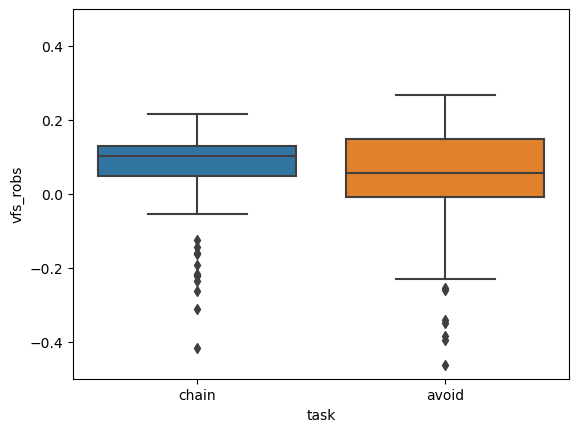

In [13]:
fix, ax = plt.subplots()
sns.boxplot(data=df_plot, x="task", y="vfs_robs", ax=ax)
ax.set_ylim(-0.5, 0.5)
plt.show()

In [15]:
df1 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=1)
df2 = pd.DataFrame(np.random.randn(5,5), columns=list(range(1,6))).assign(Trial=2)
cdf = pd.concat([df1, df2])
cdf

,1,2,3,4,5,Trial
0,-1.475260,0.131235,0.823887,0.983899,-0.647340,1
1,0.445431,1.653064,0.620605,0.194017,-0.388020,1
2,-0.448533,-0.480779,0.680482,0.570669,-0.640830,1
3,0.464689,0.362430,-0.421927,-0.640572,-1.030635,1
4,0.221793,-1.896577,0.959865,1.139565,0.051318,1
0,0.622068,-0.783436,0.085411,0.183534,1.172313,2
1,1.265126,-0.623888,0.771100,-0.787610,-0.476810,2
2,-0.257728,-0.023299,-1.868390,-0.094173,0.813316,2
3,-0.688639,1.680944,1.591035,0.504736,0.802157,2
4,-1.000424,-0.796712,0.438343,-0.445963,0.125748,2


In [17]:
mdf = pd.melt(df_plot[['vfs_robs', 'gt_robs', 'task']], id_vars=['task'])
mdf

,task,variable,value
0,chain,vfs_robs,-0.007133
1,chain,vfs_robs,0.088723
2,chain,vfs_robs,0.197745
3,chain,vfs_robs,-0.235873
4,chain,vfs_robs,0.049493
...,...,...,...
395,avoid,gt_robs,0.262211
396,avoid,gt_robs,-1.512888
397,avoid,gt_robs,0.290973
398,avoid,gt_robs,0.191886


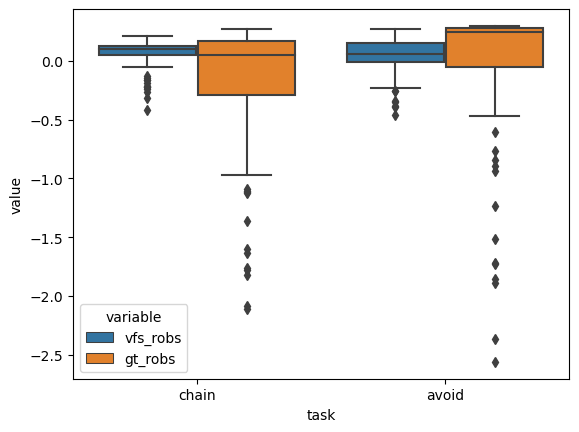

In [21]:
fig, ax = plt.subplots()
sns.boxplot(data=mdf, x="task", y="value", hue='variable', ax=ax)
# ax.set_ylim(-0.5, 0.5)
plt.show()
fig.savefig('time_step=100.png')